<a href="https://colab.research.google.com/github/pitarac/principia/blob/main/principia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

        # Importação das bibliotecas necessárias
        import pandas as pd
        import numpy as np
        import matplotlib.pyplot as plt
        from sklearn.model_selection import train_test_split
        from sklearn.preprocessing import StandardScaler
        from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
        from sklearn.ensemble import RandomForestClassifier
        import requests
        import os
        import zipfile
        import io


In [ ]:

        # URL to the ZIP file
        url_zip = "https://datasavvy.com.br/principia/dados_teste_ciencia_dados.zip"

        # Download the ZIP file and save it locally
        response = requests.get(url_zip)
        with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
            zip_ref.extractall("data")


In [ ]:

        # Carregamento dos dados
        df_alunos = pd.read_csv('data/alunos_teste.csv')
        df_acessos = pd.read_csv('data/acessos_conteudo_teste.csv')
        df_provas = pd.read_csv('data/provas_teste.csv')


          MATRICULA
count  1.477825e+06
mean   2.020776e+11
std    1.455528e+08
min    1.995017e+11
25%    2.020071e+11
50%    2.021073e+11
75%    2.022024e+11
max    2.022122e+11


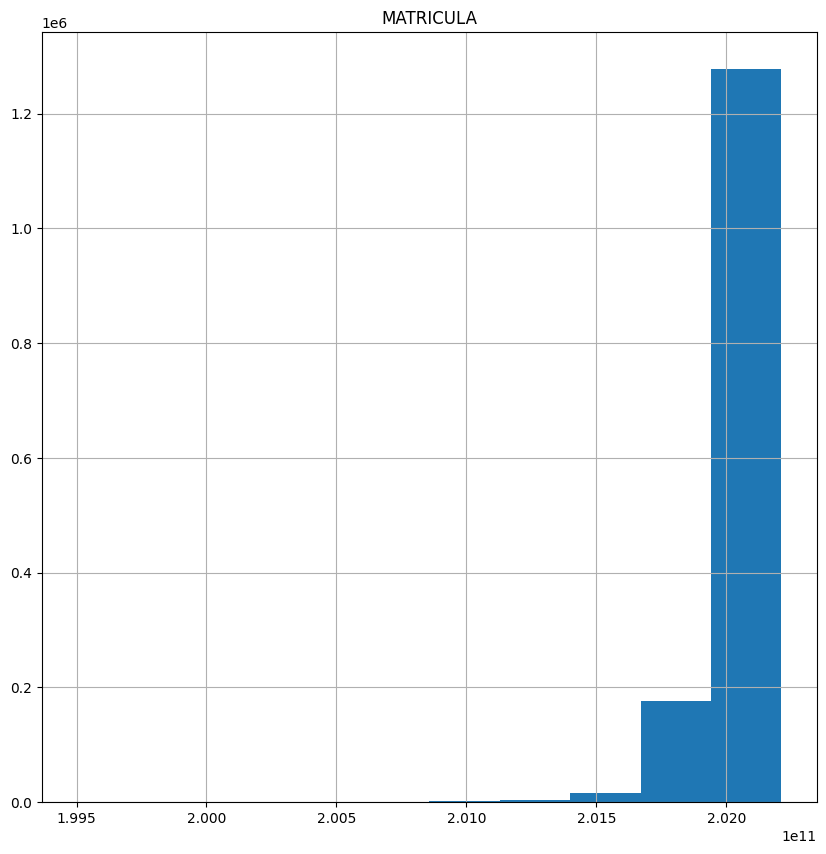

In [ ]:
# Análise Exploratória de Dados (EDA)
# Estamos gerando estatísticas descritivas e histogramas para cada coluna no df_alunos
print(df_alunos.describe())
df_alunos.hist(figsize=(10, 10))
plt.show()


In [ ]:
# Pré-processamento dos dados
# Preenchendo valores ausentes com a média e codificando variáveis categóricas
df_alunos.fillna(df_alunos.mean(), inplace=True)
df_alunos = pd.get_dummies(df_alunos)


In [ ]:
print(df_alunos.columns)
print(df_acessos.columns)
print(df_provas.columns)



Index(['MATRICULA', 'DISCIPLINA_ARA0001', 'DISCIPLINA_ARA0002',
       'DISCIPLINA_ARA0005', 'DISCIPLINA_ARA0013', 'DISCIPLINA_ARA0014',
       'DISCIPLINA_ARA0020', 'DISCIPLINA_ARA0021', 'DISCIPLINA_ARA0033',
       'DISCIPLINA_ARA0059',
       ...
       'DISCIPLINA_SDE4613', 'DISCIPLINA_SDE4618', 'DISCIPLINA_SDE4630',
       'DISCIPLINA_SDE4665', 'DISCIPLINA_SDE4732', 'DISCIPLINA_SDE4733',
       'DISCIPLINA_SDE5352', 'DISCIPLINA_SDE5353', 'DISCIPLINA_SDE5374',
       'DISCIPLINA_SDE5375'],
      dtype='object', length=1093)
Index(['DATA_HORA_ACESSO', 'TEMPO_ACESSO_MINUTOS', 'MATRICULA', 'DISCIPLINA'], dtype='object')
Index(['DATA_HORA_AVALIACAO', 'TIPO_AVALIACAO', 'MATRICULA', 'DISCIPLINA'], dtype='object')


In [ ]:
import pandas as pd

df_acessos = pd.get_dummies(df_acessos, columns=['DISCIPLINA'])
df_provas = pd.get_dummies(df_provas, columns=['DISCIPLINA'])


In [ ]:
# União das tabelas
# Estamos unindo df_alunos, df_acessos e df_provas em um único DataFrame
df = pd.merge(df_alunos, df_acessos, on='aluno_id')  # 'aluno_id' é a coluna comum
df = pd.merge(df, df_provas, on=['aluno_id', 'disciplina_id'])  # 'aluno_id' e 'disciplina_id' são as colunas comuns


In [ ]:
# Normalização dos dados
# Estamos escalando as características para que todas estejam na mesma escala
scaler = StandardScaler()
X = df.drop('evadiu', axis=1)  # Substitua 'evadiu' pela coluna que é seu alvo
y = df['evadiu']
X_scaled = scaler.fit_transform(X)


In [ ]:
# Separação dos dados em treino e teste
# Estamos dividindo os dados em um conjunto de treinamento e um conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Seleção do modelo
# Estamos escolhendo o RandomForestClassifier como nosso modelo
model = RandomForestClassifier()


In [ ]:
# Treinamento do modelo
# Estamos treinando nosso modelo usando o conjunto de treinamento
model.fit(X_train, y_train)


In [ ]:
# Avaliação do modelo
# Estamos fazendo previsões com nosso modelo usando o conjunto de teste e então avaliando o desempenho do modelo
predictions = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
